In [1]:
#System imports
import math, time

import matplotlib.pyplot as plt

import glob

#Helper imports
import numpy as np
import cv2

#Nice printout imports
from termcolor import colored

#TensorFlow
import tensorflow as tf
import keras
from keras import layers, regularizers

#Kaggle
import kagglehub

#Pandas
import pandas as pd

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.set_visible_devices([], 'GPU')

Num GPUs Available:  0


In [ ]:
files = glob.glob('/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Wojtek_*.gzip')

df = None

for file in files:
    df_tmp = pd.read_parquet(file)
    df_tmp.drop(index=0, inplace=True)
    df = pd.concat((df, df_tmp))
df.to_parquet('df.parquet_Wojtek.gzip',compression='gzip') 

import glob
files = glob.glob('/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Artur_*.gzip')

df = None

for file in files:
    df_tmp = pd.read_parquet(file)
    df_tmp.drop(index=0, inplace=True)
    df = pd.concat((df, df_tmp))
df.to_parquet('df.parquet_Artur.gzip',compression='gzip') 

In [38]:
df.describe()

,date,label,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
count,6500,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,...,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,2025-04-04 16:44:03.059390720,-4.665903,-0.293497,0.043566,-0.286032,-0.296254,-0.085276,-0.291017,-0.147348,0.513114,...,-0.069854,0.514953,-0.086148,-0.156301,0.177262,-0.125280,0.103641,0.089656,0.105619,-0.335963
min,2025-04-01 12:36:13.555427,-8.493450,-0.375000,-0.375000,-0.375000,-0.375000,-0.374998,-0.375000,-0.375000,-0.375000,...,-0.375000,-0.374486,-0.375000,-0.374999,-0.375000,-0.375000,-0.375000,-0.375000,-0.374995,-0.375000
25%,2025-04-01 12:53:19.222456320,-6.951428,-0.356757,-0.101396,-0.363531,-0.371144,-0.261688,-0.361624,-0.331810,0.098610,...,-0.305830,0.279385,-0.301210,-0.276775,-0.011937,-0.273713,-0.063161,-0.347556,-0.074926,-0.368244
50%,2025-04-01 13:13:48.189890048,-6.435334,-0.316652,0.042276,-0.332906,-0.357700,-0.140218,-0.327602,-0.213213,0.564183,...,-0.227750,0.522865,-0.132476,-0.174374,0.217483,-0.168132,0.088576,-0.248095,0.084495,-0.351805
75%,2025-04-01 13:38:10.910677504,-4.380043,-0.257316,0.183381,-0.265976,-0.293238,0.029242,-0.263189,-0.043839,0.880330,...,-0.029669,0.758173,0.033817,0.000000,0.390955,0.001967,0.239529,0.260483,0.259776,-0.322599
max,2025-04-24 19:21:36.819323,9.070258,0.598409,1.606076,0.659764,1.268398,1.287135,0.992465,1.879233,2.000997,...,2.033676,3.642326,0.984098,-0.000000,1.978871,0.699664,2.770506,3.990021,1.806138,0.324673
std,NaN,3.759510,0.086869,0.213928,0.114907,0.137379,0.241304,0.109489,0.235449,0.487844,...,0.379941,0.422805,0.250477,0.133789,0.331768,0.182294,0.242745,0.673630,0.261857,0.049903


In [71]:
file_path = 'df.parquet_Wojtek.gzip'
df_W = pd.read_parquet(file_path)

file_path = 'df.parquet_Artur.gzip'
df_A = pd.read_parquet(file_path)

file_path = '/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Monika.gzip'
df_test = pd.read_parquet(file_path)

features_W = np.asarray(df_W.drop(columns=['date','label']))
features_A = np.asarray(df_A.drop(columns=['date','label']))
features_M = np.asarray(df_M.drop(columns=['date','label']))
features_test = np.asarray(df_test.drop(columns=['date','label']))

labels_A = np.full((len(features_A),1), 0.0)
labels_W = np.full((len(features_W),1), 1.0)
labels_M = np.full((len(features_M),1), 2.0)
labels_test = np.full((len(features_test),1), 3.0)

features_X = (features_A[:5000] + features_W[:5000])/2.0
labels_X = np.full((len(features_X),1), 2.0)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 32)             │        40,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,147 (164.64 KB)

 Trainable params: 42,147 (164.64 KB)

 Non-trainable params: 0 (0.00 B)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141 - sparse_categorical_accuracy: 0.9999 


[0.017633475363254547, 0.999155580997467]

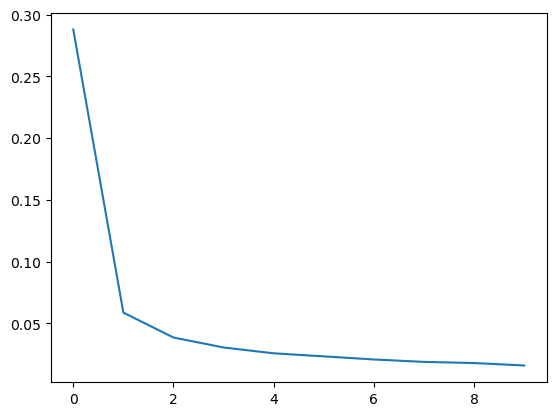

In [76]:
labels = np.concatenate( (labels_A, labels_W, labels_X) )
features = np.concatenate( (features_A, features_W, features_X) )

model = keras.Sequential(
    [
        layers.Input(shape=(features.shape[1],)),
        #tf.keras.layers.Normalization(axis=-1),
        #layers.Dense(features.shape[1], activation="sigmoid", kernel_regularizer="l1"),
        #layers.Dense(features.shape[1]//2, activation="relu"),
        layers.Dense(32, activation="sigmoid", kernel_regularizer=regularizers.L2(0.0001)),
        layers.Dense(32, activation="sigmoid", kernel_regularizer=regularizers.L2(0.0001)),
        layers.Dense(3, activation="softmax", kernel_regularizer=None),
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
model.summary()

history = model.fit(
    features,
    labels,
    batch_size=64,
    epochs=10,
    shuffle=True,
    validation_split = 0.1,
    #class_weight = {0:1.0,1:1.0,2:10.0},
    verbose=0
)

plt.plot(history.history["loss"])

model.save(filepath="./model_A_vs_W.keras")
model.evaluate(features, labels, batch_size=128)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
A width: 0.0
W width: 0.016512204351993208
test width: 0.8631251819641912
A-W distance: 60.544749290641775


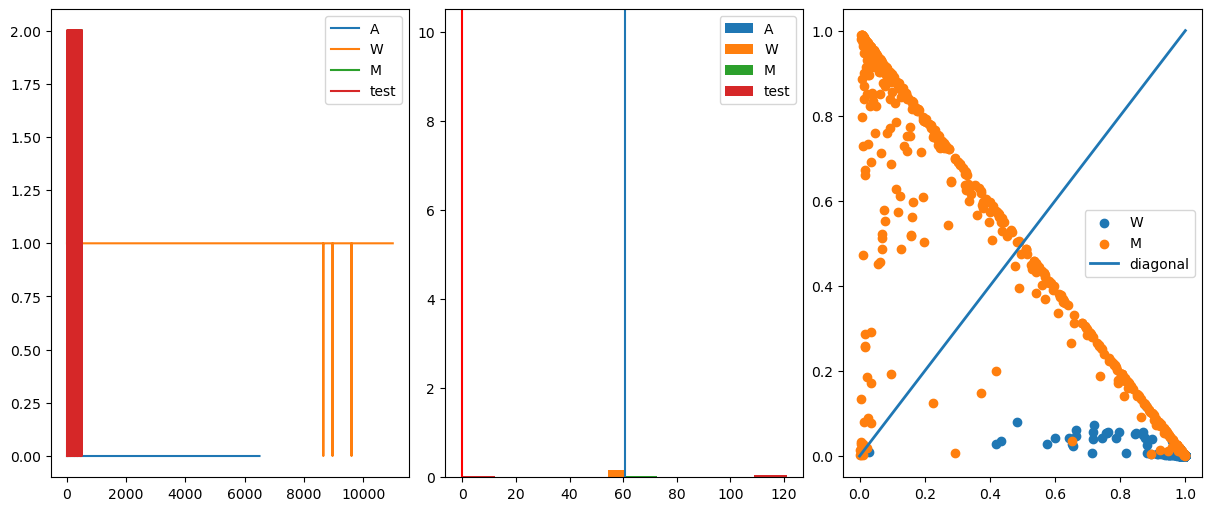

In [91]:
model = keras.saving.load_model("model_A_vs_W.keras")

feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=[model.layers[-2].output],
)

response_A = np.argmax(model.predict(features_A), axis=1)
response_W =  np.argmax(model.predict(features_W), axis=1)
response_M =  np.argmax(model.predict(features_M), axis=1)
response_test =  2*(model.predict(features_test)[:,2]>0.2)

features_2D_A = model.predict(features_A)
features_2D_W = model.predict(features_W)
features_2D_test = model.predict(features_test)
features_2D_M =  model.predict(features_test)

fig, axes = plt.subplots(1,3,layout='constrained', figsize = (12,5))

axes[0].plot(response_A[:], label="A")
axes[0].plot(response_W[:], label="W")
axes[0].plot(response_M[:], label="M")
axes[0].plot(response_test[:], label="test")
axes[0].legend();

sigma_A = response_A.std()
sigma_W = response_W.std()
sigma_M = response_test.std()

sigma = np.sqrt(sigma_A**2 + sigma_W**2)
distance = np.mean(response_A/sigma) - np.mean(response_W/sigma)
axes[1].hist(response_A[:]/sigma, density=True, label="A")
axes[1].hist(response_W[:]/sigma, density=True, label="W")
axes[1].hist(response_M[:]/sigma, density=True, label="M")
axes[1].hist(response_test[:]/sigma, density=True, label="test")
axes[1].axvline(x=np.mean(response_A/sigma),color="red")
axes[1].axvline(x=np.mean(response_W/sigma))
axes[1].legend();

print(colored("A width:","blue"),sigma_A)
print(colored("W width:","blue"),sigma_W)
print(colored("test width:","blue"),sigma_M)
print(colored("A-W distance:","blue"),np.abs(distance))

#axes[2].scatter(features_2D_A[:,0], features_2D_A[:,1], label="A")
axes[2].scatter(features_2D_W[:,1], features_2D_W[:,2], label="W")
axes[2].scatter(features_2D_M[:,1], features_2D_M[:,2], label="M")
axes[2].plot([0,1], [0,1], lw=2, label="diagonal")
axes[2].legend();

A [-10.280153]
W [9.230135]
M [0.48557505]
test [3.7915716]


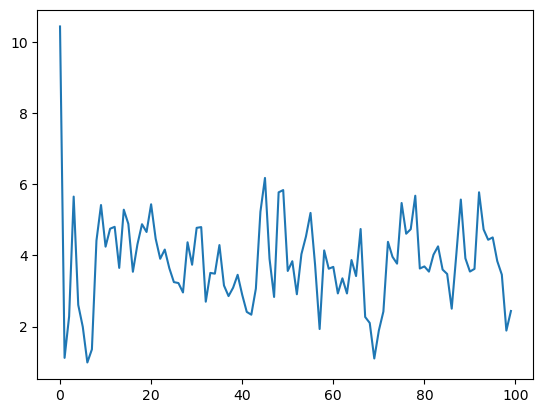

In [7]:
v1 = response_W[:4000,:]
v2 = response_A[:4000,:]

v1 = response_W[:100,:]
v2 = response_test[:100,:]

x = np.sum(np.abs(v1-v2), axis=1)
#x /=sigma_W
#x /=  np.sqrt(np.sum(v1**2, axis=1))
#x /=  np.sqrt(np.sum(v2**2, axis=1))
plt.plot(x)
print(colored("A","blue"),response_A[20,:])
print(colored("W","blue"),response_W[20,:])
print(colored("M","blue"),response_M[20,:])
print(colored("test","blue"),response_test[20,:])

In [ ]:
last_layer = model.layers[-1]
x = feature_extractor(features_A)[0:1,:].numpy()
print(x[:,-2:])
print("Original features:",last_layer(x))

x[:,-2] = 1
x[:,-1] = 0
print(x[:,-2:])

print("Modified features:",last_layer(x))
#last_layer = model.layers[-1]
#last_layer(feature_extractor(features_A))[0]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/home/akalinow/scratch/venv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(100, 1280))
  warnings.warn(msg)
/home/akalinow/scratch/venv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1000, 1280))
  warnings.warn(msg)


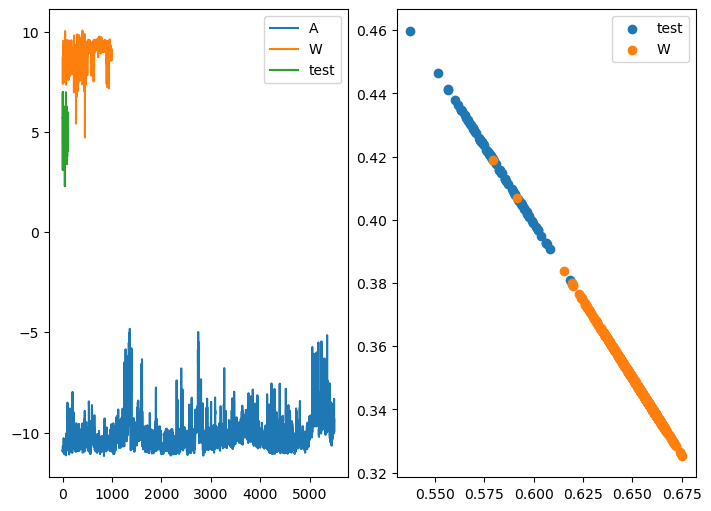

In [8]:
file_path = '/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Marcin.gzip'

df_test = pd.read_parquet(file_path)
df_test.drop(index=0, inplace=True)
features_test = np.asarray(df_test.drop(columns=['date','label']))

model = keras.saving.load_model("model_A_vs_W.keras")

response_A = model.predict(features_A)
response_W = model.predict(features_W)
response_test = model.predict(features_test)

features_2D_test = feature_extractor(features_test)
features_2D_W = feature_extractor(features_W)

fig, axes = plt.subplots(1,2,layout='constrained', figsize = (7,5))

axes[0].plot(response_A, label="A")
axes[0].plot(response_W, label="W")
axes[0].plot(response_test, label="test")
axes[0].legend();

axes[1].scatter(features_2D_test[:,0], features_2D_test[:,1], label="test")
axes[1].scatter(features_2D_W[:,0], features_2D_W[:,1], label="W")
axes[1].legend();